# 06 Análisis de Relación entre Pesos de Género y Índice de Kothari (Sin CODELCO)

Objetivo del Notebook: Analizar si existen diferencias significativas en las variables de peso (representación de mujeres en directorios y ejecutivos) con respecto al índice de devengos discrecionales de Kothari, excluyendo los datos de la empresa CODELCO.

## Carga de datos y configuración inicial

In [1]:
# Cargar la sesión de Kedro
%load_ext kedro.ipython
%reload_kedro

[11/09/25 20:40:30] INFO     Using                                                                  ]8;id=46;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=536126;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/framework/project/__init__.py#272\272]8;;\
                             '/home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/                
                             kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/f                
                             ramework/project/rich_logging.yml' as logging configuration.                          

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=999128;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=941271;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#63\63]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=657686;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=820086;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#65\65]8;;\

                    INFO     Resolved project path as:                                              ]8;id=727357;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=89526;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             /home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/k                
                             otari-gender-data-analysis.                                                           
                             To set a different path, run '%reload_kedro <project_root>'                           

[11/09/25 20:40:31] INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=948392;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=345765;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

[11/09/25 20:40:36] INFO     Kedro project kotari-gender-data-analysis                              ]8;id=571297;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=342356;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=733026;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=336669;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

[11/09/25 20:40:37] INFO     Registered line magic 'run_viz'                                        ]8;id=439727;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=998054;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#153\153]8;;\

                    INFO     Resolved project path as:                                              ]8;id=193956;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=302791;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#180\180]8;;\
                             /home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/k                
                             otari-gender-data-analysis.                                                           
                             To set a different path, run '%reload_kedro <project_root>'                           

                    INFO     Kedro is sending anonymous usage data with the sole purpose of improving ]8;id=526692;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro_telemetry/plugin.py\plugin.py]8;;\:]8;id=301876;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro_telemetry/plugin.py#243\243]8;;\
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/configuration/telemetry.html                         

                    INFO     Kedro project kotari-gender-data-analysis                              ]8;id=948050;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=411436;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#146\146]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=493684;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=643378;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#147\147]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=394388;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=729943;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/ipython/__init__.py#153\153]8;;\

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, spearmanr, ttest_ind, mannwhitneyu
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Markdown

# Configurar el estilo de gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [3]:
# Cargar el dataset de análisis generado en el notebook 03
df_analysis = catalog.load("kothari_analysis_data")

# Filtrar para excluir CODELCO
df_analysis = df_analysis[df_analysis['EMPRESA'] != 'CODELCO'].reset_index(drop=True)

print(f"Dataset cargado con {df_analysis.shape[0]} filas y {df_analysis.shape[1]} columnas")
print(f"(Nota: CODELCO ha sido excluida del análisis)")
print(f"\nColumnas disponibles:")
print(df_analysis.columns.tolist())
print(f"\nEmpresas únicas: {df_analysis['EMPRESA'].nunique()}")
print(f"Empresas incluidas: {sorted(df_analysis['EMPRESA'].unique())}")
print(f"Años cubiertos: {sorted(df_analysis['ANIO'].unique())}")

[11/09/25 20:40:38] INFO     Loading data from kothari_analysis_data (ParquetDataset)...        ]8;id=669939;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=539386;file:///home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/.venv/lib/python3.11/site-packages/kedro/io/data_catalog.py#403\403]8;;\

Dataset cargado con 148 filas y 12 columnas
(Nota: CODELCO ha sido excluida del análisis)

Columnas disponibles:
['EMPRESA', 'ANIO', 'Y', 'X1', 'X2', 'X3', 'X4', 'Y_predicho', 'KOTHARI_INDEX', 'peso_empresa', 'peso_muj_dir', 'peso_muj_ejec']

Empresas únicas: 15
Empresas incluidas: ['ALGORTA NORTE S.A.', 'ANGLO AMERICAN SUR S.A. (EX MINERA SUR ANDES LTDA.)', 'COMPAÑIA MINERA CERRO COLORADO LTDA.', 'COMPAÑIA MINERA DOÑA INÉS DE COLLAHUASI SCM', 'COMPAÑIA MINERA MANTOS DE ORO', 'COMPAÑIA MINERA MARICUNGA S.A.', 'COMPAÑIA MINERA NEVADA SPA', 'COMPAÑIA MINERA TECK CARMEN DE ANDACOLLO', 'MINERA ANTUCOYA', 'MINERA ESCONDIDA LIMITADA', 'MINERA LOS PELAMBRES', 'MINERA SPENCE S.A.', 'NORTE ABIERTO SPA', 'SOCIEDAD CONTRACTUAL MINERA EL ABRA', 'SOCIEDAD CONTRACTUAL MINERA EL MORRO']
Años cubiertos: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


## Estadísticas Descriptivas de Variables de Peso

In [4]:
# Estadísticas descriptivas de los pesos
print("Estadísticas Descriptivas de Variables de Peso:")
print("\n1. Peso de Empresa (% de activos totales):")
print(df_analysis['peso_empresa'].describe())

print("\n2. Peso de Mujeres en Directorios (% de directorios con mujeres):")
print(df_analysis['peso_muj_dir'].describe())

print("\n3. Peso de Mujeres Ejecutivas (% de ejecutivos que son mujeres):")
print(df_analysis['peso_muj_ejec'].describe())

print("\n4. Índice de Kothari (Devengos Discrecionales):")
print(df_analysis['KOTHARI_INDEX'].describe())

Estadísticas Descriptivas de Variables de Peso:

1. Peso de Empresa (% de activos totales):
count    148.000000
mean       3.703696
std        5.000608
min        0.322877
25%        0.537882
50%        1.289446
75%        6.300341
max       19.742250
Name: peso_empresa, dtype: float64

2. Peso de Mujeres en Directorios (% de directorios con mujeres):
count    106.000000
mean      18.488435
std       11.378773
min        2.439024
25%        8.571429
50%       15.789474
75%       31.250000
max       35.227273
Name: peso_muj_dir, dtype: float64

3. Peso de Mujeres Ejecutivas (% de ejecutivos que son mujeres):
count    137.000000
mean       8.361957
std        6.702233
min        0.000000
25%        2.272727
50%        9.090909
75%       10.526316
max       20.610687
Name: peso_muj_ejec, dtype: float64

4. Índice de Kothari (Devengos Discrecionales):
count    148.000000
mean      -0.003416
std        0.170379
min       -1.168834
25%       -0.042479
50%        0.024601
75%        0.069128


## Análisis de Correlación

In [5]:
# Calcular correlaciones de Pearson
print("="*70)
print("CORRELACIÓN DE PEARSON")
print("="*70)

variables_peso = ['peso_empresa', 'peso_muj_dir', 'peso_muj_ejec']
variable_target = 'KOTHARI_INDEX'

correlaciones_pearson = []
for var in variables_peso:
    # Eliminar valores NaN
    data_clean = df_analysis[[var, variable_target]].dropna()
    corr, p_value = pearsonr(data_clean[var], data_clean[variable_target])
    correlaciones_pearson.append({
        'Variable': var,
        'Correlación': corr,
        'P-value': p_value,
        'Significancia': 'Sí' if p_value < 0.05 else 'No'
    })
    print(f"\n{var}:")
    print(f"  Correlación: {corr:.6f}")
    print(f"  P-value: {p_value:.6f}")
    print(f"  Significancia (α=0.05): {'Sí' if p_value < 0.05 else 'No'}")

df_corr_pearson = pd.DataFrame(correlaciones_pearson)
print("\n" + "="*70)
display(df_corr_pearson)

CORRELACIÓN DE PEARSON

peso_empresa:
  Correlación: -0.174770
  P-value: 0.033626
  Significancia (α=0.05): Sí

peso_muj_dir:
  Correlación: 0.021563
  P-value: 0.826337
  Significancia (α=0.05): No

peso_muj_ejec:
  Correlación: 0.075796
  P-value: 0.378691
  Significancia (α=0.05): No



,Variable,Correlación,P-value,Significancia
0,peso_empresa,-0.174770,0.033626,Sí
1,peso_muj_dir,0.021563,0.826337,No
2,peso_muj_ejec,0.075796,0.378691,No


In [6]:
# Calcular correlaciones de Spearman (no paramétrica)
print("="*70)
print("CORRELACIÓN DE SPEARMAN (No Paramétrica)")
print("="*70)

correlaciones_spearman = []
for var in variables_peso:
    # Eliminar valores NaN
    data_clean = df_analysis[[var, variable_target]].dropna()
    corr, p_value = spearmanr(data_clean[var], data_clean[variable_target])
    correlaciones_spearman.append({
        'Variable': var,
        'Correlación': corr,
        'P-value': p_value,
        'Significancia': 'Sí' if p_value < 0.05 else 'No'
    })
    print(f"\n{var}:")
    print(f"  Correlación: {corr:.6f}")
    print(f"  P-value: {p_value:.6f}")
    print(f"  Significancia (α=0.05): {'Sí' if p_value < 0.05 else 'No'}")

df_corr_spearman = pd.DataFrame(correlaciones_spearman)
print("\n" + "="*70)
display(df_corr_spearman)

CORRELACIÓN DE SPEARMAN (No Paramétrica)

peso_empresa:
  Correlación: -0.239926
  P-value: 0.003313
  Significancia (α=0.05): Sí

peso_muj_dir:
  Correlación: 0.177723
  P-value: 0.068362
  Significancia (α=0.05): No

peso_muj_ejec:
  Correlación: 0.028893
  P-value: 0.737505
  Significancia (α=0.05): No



,Variable,Correlación,P-value,Significancia
0,peso_empresa,-0.239926,0.003313,Sí
1,peso_muj_dir,0.177723,0.068362,No
2,peso_muj_ejec,0.028893,0.737505,No


## Análisis de Diferencias por Categorías

Dividir las variables en categorías (alto, medio, bajo) y verificar diferencias significativas.

In [7]:
# Crear categorías para los pesos
df_categorizado = df_analysis.copy()

# Función para categorizar
def categorizar(series, nombre):
    tercil_33 = series.quantile(0.33)
    tercil_67 = series.quantile(0.67)
    
    categorias = pd.cut(series, 
                        bins=[series.min()-1, tercil_33, tercil_67, series.max()+1],
                        labels=['Bajo', 'Medio', 'Alto'])
    return categorias

# Categorizar cada variable de peso
df_categorizado['peso_empresa_cat'] = categorizar(df_categorizado['peso_empresa'], 'peso_empresa')
df_categorizado['peso_muj_dir_cat'] = categorizar(df_categorizado['peso_muj_dir'], 'peso_muj_dir')
df_categorizado['peso_muj_ejec_cat'] = categorizar(df_categorizado['peso_muj_ejec'], 'peso_muj_ejec')

print("Variables categorizadas en terciles (Bajo, Medio, Alto)")
print(f"\nDistribución de categorías:")
print("\nPeso de Empresa:")
print(df_categorizado['peso_empresa_cat'].value_counts())
print("\nPeso de Mujeres en Directorios:")
print(df_categorizado['peso_muj_dir_cat'].value_counts())
print("\nPeso de Mujeres Ejecutivas:")
print(df_categorizado['peso_muj_ejec_cat'].value_counts())

Variables categorizadas en terciles (Bajo, Medio, Alto)

Distribución de categorías:

Peso de Empresa:
peso_empresa_cat
Bajo     51
Medio    50
Alto     47
Name: count, dtype: int64

Peso de Mujeres en Directorios:
peso_muj_dir_cat
Medio    42
Bajo     35
Alto     29
Name: count, dtype: int64

Peso de Mujeres Ejecutivas:
peso_muj_ejec_cat
Medio    50
Bajo     48
Alto     39
Name: count, dtype: int64


In [8]:
# Análisis de Varianza (ANOVA) para cada categoría
print("="*70)
print("ANÁLISIS DE VARIANZA (ANOVA) POR CATEGORÍA")
print("="*70)

# Preparar datos para ANOVA
grupos_empresa = [group['KOTHARI_INDEX'].dropna().values 
                  for name, group in df_categorizado.groupby('peso_empresa_cat')]
grupos_muj_dir = [group['KOTHARI_INDEX'].dropna().values 
                  for name, group in df_categorizado.groupby('peso_muj_dir_cat')]
grupos_muj_ejec = [group['KOTHARI_INDEX'].dropna().values 
                   for name, group in df_categorizado.groupby('peso_muj_ejec_cat')]

# Realizar ANOVA
f_stat_empresa, p_value_empresa = stats.f_oneway(*grupos_empresa)
f_stat_muj_dir, p_value_muj_dir = stats.f_oneway(*grupos_muj_dir)
f_stat_muj_ejec, p_value_muj_ejec = stats.f_oneway(*grupos_muj_ejec)

print(f"\nPeso de Empresa:")
print(f"  F-statistic: {f_stat_empresa:.6f}")
print(f"  P-value: {p_value_empresa:.6f}")
print(f"  Significancia (α=0.05): {'Sí' if p_value_empresa < 0.05 else 'No'}")

print(f"\nPeso de Mujeres en Directorios:")
print(f"  F-statistic: {f_stat_muj_dir:.6f}")
print(f"  P-value: {p_value_muj_dir:.6f}")
print(f"  Significancia (α=0.05): {'Sí' if p_value_muj_dir < 0.05 else 'No'}")

print(f"\nPeso de Mujeres Ejecutivas:")
print(f"  F-statistic: {f_stat_muj_ejec:.6f}")
print(f"  P-value: {p_value_muj_ejec:.6f}")
print(f"  Significancia (α=0.05): {'Sí' if p_value_muj_ejec < 0.05 else 'No'}")
print("\n" + "="*70)

ANÁLISIS DE VARIANZA (ANOVA) POR CATEGORÍA


                    WARNING  /tmp/ipykernel_577592/10422206.py:8: FutureWarning: The default of     ]8;id=259175;file:///home/gabriel/.local/share/uv/python/cpython-3.11.10-linux-x86_64-gnu/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=371375;file:///home/gabriel/.local/share/uv/python/cpython-3.11.10-linux-x86_64-gnu/lib/python3.11/warnings.py#110\110]8;;\
                             observed=False is deprecated and will be changed to True in a future                  
                             version of pandas. Pass observed=False to retain current behavior or                  
                             observed=True to adopt the future default and silence this warning.                   
                               for name, group in df_categorizado.groupby('peso_empresa_cat')]                     
                                                                                                                   

                    WARNING  /tmp/ipykernel_577592/10422206.py:10: FutureWarning: The default of    ]8;id=860277;file:///home/gabriel/.local/share/uv/python/cpython-3.11.10-linux-x86_64-gnu/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=600920;file:///home/gabriel/.local/share/uv/python/cpython-3.11.10-linux-x86_64-gnu/lib/python3.11/warnings.py#110\110]8;;\
                             observed=False is deprecated and will be changed to True in a future                  
                             version of pandas. Pass observed=False to retain current behavior or                  
                             observed=True to adopt the future default and silence this warning.                   
                               for name, group in df_categorizado.groupby('peso_muj_dir_cat')]                     
                                                                                                                   

                    WARNING  /tmp/ipykernel_577592/10422206.py:12: FutureWarning: The default of    ]8;id=607646;file:///home/gabriel/.local/share/uv/python/cpython-3.11.10-linux-x86_64-gnu/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=253726;file:///home/gabriel/.local/share/uv/python/cpython-3.11.10-linux-x86_64-gnu/lib/python3.11/warnings.py#110\110]8;;\
                             observed=False is deprecated and will be changed to True in a future                  
                             version of pandas. Pass observed=False to retain current behavior or                  
                             observed=True to adopt the future default and silence this warning.                   
                               for name, group in df_categorizado.groupby('peso_muj_ejec_cat')]                    
                                                                                                                   


Peso de Empresa:
  F-statistic: 1.479343
  P-value: 0.231205
  Significancia (α=0.05): No

Peso de Mujeres en Directorios:
  F-statistic: 0.228103
  P-value: 0.796444
  Significancia (α=0.05): No

Peso de Mujeres Ejecutivas:
  F-statistic: 0.118991
  P-value: 0.887909
  Significancia (α=0.05): No



In [9]:
# Mostrar estadísticas descriptivas por categoría
print("\nÍndice de Kothari por Categoría de Peso de Empresa:")
print(df_categorizado.groupby('peso_empresa_cat', observed=True)['KOTHARI_INDEX'].describe())

print("\nÍndice de Kothari por Categoría de Peso de Mujeres en Directorios:")
print(df_categorizado.groupby('peso_muj_dir_cat', observed=True)['KOTHARI_INDEX'].describe())

print("\nÍndice de Kothari por Categoría de Peso de Mujeres Ejecutivas:")
print(df_categorizado.groupby('peso_muj_ejec_cat', observed=True)['KOTHARI_INDEX'].describe())


Índice de Kothari por Categoría de Peso de Empresa:
                  count      mean       std       min       25%       50%  \
peso_empresa_cat                                                            
Bajo               51.0  0.005820  0.228901 -1.168834 -0.011022  0.059115   
Medio              50.0  0.019343  0.150985 -0.555846 -0.022477  0.032457   
Alto               47.0 -0.037650  0.098370 -0.314504 -0.086158 -0.014844   

                       75%       max  
peso_empresa_cat                      
Bajo              0.075672  0.363380  
Medio             0.087921  0.356565  
Alto              0.033069  0.149931  

Índice de Kothari por Categoría de Peso de Mujeres en Directorios:
                  count      mean       std       min       25%       50%  \
peso_muj_dir_cat                                                            
Bajo               35.0 -0.019568  0.092788 -0.245438 -0.064788 -0.012275   
Medio              42.0 -0.007217  0.142130 -0.555846 -0.029223  0.

## Visualizaciones

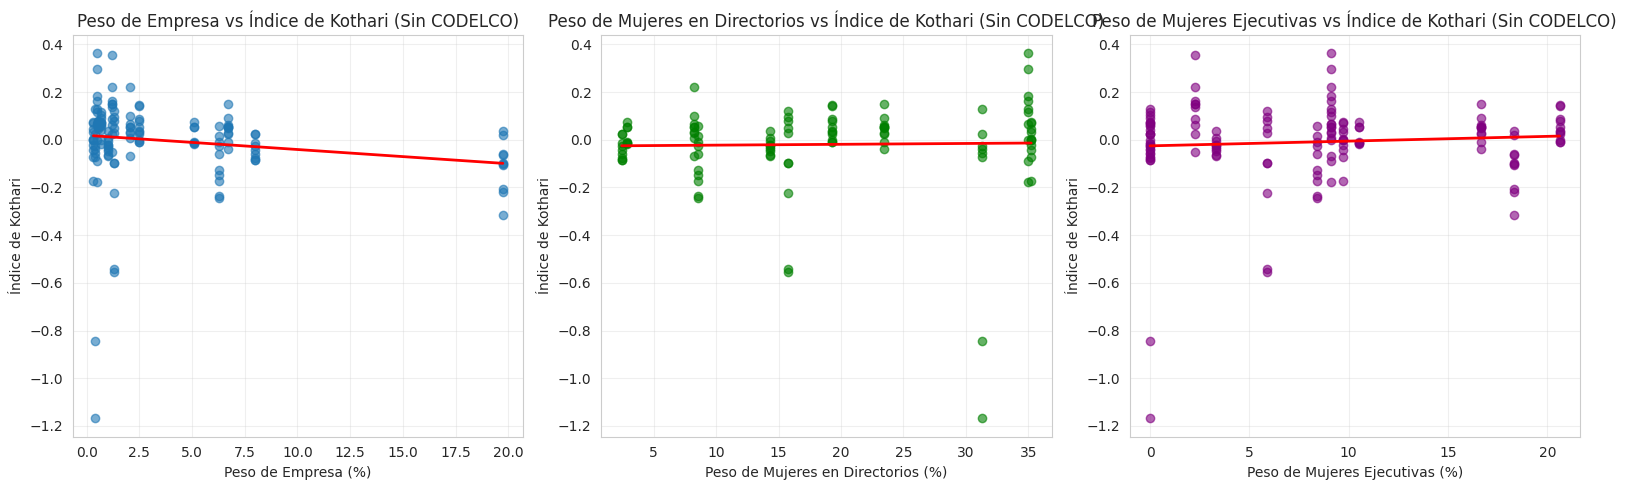

Gráficos de dispersión guardados.


In [10]:
# Gráficos de dispersión con línea de tendencia
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Peso de Empresa vs Índice de Kothari
axes[0].scatter(df_analysis['peso_empresa'], df_analysis['KOTHARI_INDEX'], alpha=0.6)
z = np.polyfit(df_analysis['peso_empresa'].dropna(), 
                df_analysis.loc[df_analysis['peso_empresa'].notna(), 'KOTHARI_INDEX'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_analysis['peso_empresa'].min(), df_analysis['peso_empresa'].max(), 100)
axes[0].plot(x_line, p(x_line), "r-", linewidth=2)
axes[0].set_xlabel('Peso de Empresa (%)')
axes[0].set_ylabel('Índice de Kothari')
axes[0].set_title('Peso de Empresa vs Índice de Kothari (Sin CODELCO)')
axes[0].grid(True, alpha=0.3)

# Peso de Mujeres en Directorios vs Índice de Kothari
axes[1].scatter(df_analysis['peso_muj_dir'], df_analysis['KOTHARI_INDEX'], alpha=0.6, color='green')
z = np.polyfit(df_analysis['peso_muj_dir'].dropna(), 
                df_analysis.loc[df_analysis['peso_muj_dir'].notna(), 'KOTHARI_INDEX'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_analysis['peso_muj_dir'].min(), df_analysis['peso_muj_dir'].max(), 100)
axes[1].plot(x_line, p(x_line), "r-", linewidth=2)
axes[1].set_xlabel('Peso de Mujeres en Directorios (%)')
axes[1].set_ylabel('Índice de Kothari')
axes[1].set_title('Peso de Mujeres en Directorios vs Índice de Kothari (Sin CODELCO)')
axes[1].grid(True, alpha=0.3)

# Peso de Mujeres Ejecutivas vs Índice de Kothari
axes[2].scatter(df_analysis['peso_muj_ejec'], df_analysis['KOTHARI_INDEX'], alpha=0.6, color='purple')
z = np.polyfit(df_analysis['peso_muj_ejec'].dropna(), 
                df_analysis.loc[df_analysis['peso_muj_ejec'].notna(), 'KOTHARI_INDEX'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_analysis['peso_muj_ejec'].min(), df_analysis['peso_muj_ejec'].max(), 100)
axes[2].plot(x_line, p(x_line), "r-", linewidth=2)
axes[2].set_xlabel('Peso de Mujeres Ejecutivas (%)')
axes[2].set_ylabel('Índice de Kothari')
axes[2].set_title('Peso de Mujeres Ejecutivas vs Índice de Kothari (Sin CODELCO)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/docs/source/weight_vs_kothari_scatter_sin_codelco.png', dpi=100, bbox_inches='tight')
plt.show()

print("Gráficos de dispersión guardados.")

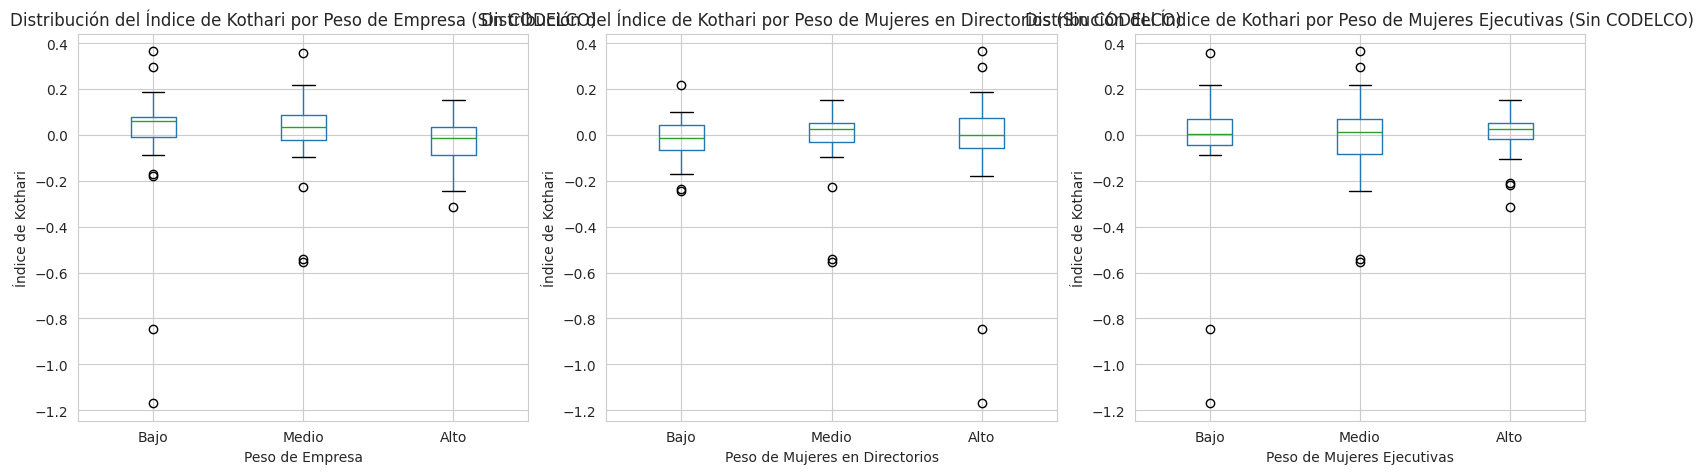

Boxplots por categoría guardados.


In [11]:
# Boxplots por categoría
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Boxplot para Peso de Empresa
df_categorizado.boxplot(column='KOTHARI_INDEX', by='peso_empresa_cat', ax=axes[0])
axes[0].set_xlabel('Peso de Empresa')
axes[0].set_ylabel('Índice de Kothari')
axes[0].set_title('Distribución del Índice de Kothari por Peso de Empresa (Sin CODELCO)')

# Boxplot para Peso de Mujeres en Directorios
df_categorizado.boxplot(column='KOTHARI_INDEX', by='peso_muj_dir_cat', ax=axes[1])
axes[1].set_xlabel('Peso de Mujeres en Directorios')
axes[1].set_ylabel('Índice de Kothari')
axes[1].set_title('Distribución del Índice de Kothari por Peso de Mujeres en Directorios (Sin CODELCO)')

# Boxplot para Peso de Mujeres Ejecutivas
df_categorizado.boxplot(column='KOTHARI_INDEX', by='peso_muj_ejec_cat', ax=axes[2])
axes[2].set_xlabel('Peso de Mujeres Ejecutivas')
axes[2].set_ylabel('Índice de Kothari')
axes[2].set_title('Distribución del Índice de Kothari por Peso de Mujeres Ejecutivas (Sin CODELCO)')

plt.suptitle('')  # Eliminar el título general
plt.tight_layout()
plt.savefig('/home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/docs/source/weight_categories_boxplot_sin_codelco.png', dpi=100, bbox_inches='tight')
plt.show()

print("Boxplots por categoría guardados.")

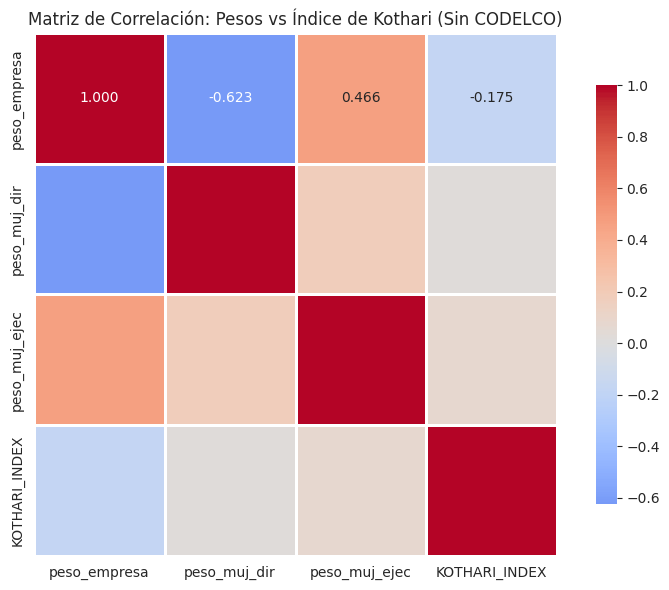


Matriz de Correlación:


,peso_empresa,peso_muj_dir,peso_muj_ejec,KOTHARI_INDEX
peso_empresa,1.000000,-0.622542,0.466382,-0.174770
peso_muj_dir,-0.622542,1.000000,0.170432,0.021563
peso_muj_ejec,0.466382,0.170432,1.000000,0.075796
KOTHARI_INDEX,-0.174770,0.021563,0.075796,1.000000


In [12]:
# Matriz de correlación
variables_analysis = ['peso_empresa', 'peso_muj_dir', 'peso_muj_ejec', 'KOTHARI_INDEX']
corr_matrix = df_analysis[variables_analysis].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
plt.title('Matriz de Correlación: Pesos vs Índice de Kothari (Sin CODELCO)')
plt.tight_layout()
plt.savefig('/home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/docs/source/correlation_matrix_sin_codelco.png', dpi=100, bbox_inches='tight')
plt.show()

print("\nMatriz de Correlación:")
display(corr_matrix)

## Resumen de Hallazgos

In [13]:
# Crear un resumen de los hallazgos
hallazgos = {
    'Variable': [],
    'Correlación Pearson': [],
    'P-value Pearson': [],
    'Significancia Pearson': [],
    'Correlación Spearman': [],
    'P-value Spearman': [],
    'Significancia Spearman': [],
    'ANOVA F-stat': [],
    'ANOVA P-value': [],
    'Significancia ANOVA': []
}

# Llenar con datos del análisis realizado
for i, var in enumerate(variables_peso):
    hallazgos['Variable'].append(var)
    hallazgos['Correlación Pearson'].append(df_corr_pearson.iloc[i]['Correlación'])
    hallazgos['P-value Pearson'].append(df_corr_pearson.iloc[i]['P-value'])
    hallazgos['Significancia Pearson'].append(df_corr_pearson.iloc[i]['Significancia'])
    hallazgos['Correlación Spearman'].append(df_corr_spearman.iloc[i]['Correlación'])
    hallazgos['P-value Spearman'].append(df_corr_spearman.iloc[i]['P-value'])
    hallazgos['Significancia Spearman'].append(df_corr_spearman.iloc[i]['Significancia'])

hallazgos['ANOVA F-stat'] = [f_stat_empresa, f_stat_muj_dir, f_stat_muj_ejec]
hallazgos['ANOVA P-value'] = [p_value_empresa, p_value_muj_dir, p_value_muj_ejec]
hallazgos['Significancia ANOVA'] = [
    'Sí' if p_value_empresa < 0.05 else 'No',
    'Sí' if p_value_muj_dir < 0.05 else 'No',
    'Sí' if p_value_muj_ejec < 0.05 else 'No'
]

df_hallazgos = pd.DataFrame(hallazgos)

print("\n" + "="*100)
print("RESUMEN DE HALLAZGOS: DIFERENCIAS SIGNIFICATIVAS ENTRE PESOS Y ÍNDICE DE KOTHARI (SIN CODELCO)")
print("="*100)
display(df_hallazgos)
print("\n" + "="*100)


RESUMEN DE HALLAZGOS: DIFERENCIAS SIGNIFICATIVAS ENTRE PESOS Y ÍNDICE DE KOTHARI (SIN CODELCO)


,Variable,Correlación Pearson,P-value Pearson,Significancia Pearson,Correlación Spearman,P-value Spearman,Significancia Spearman,ANOVA F-stat,ANOVA P-value,Significancia ANOVA
0,peso_empresa,-0.174770,0.033626,Sí,-0.239926,0.003313,Sí,1.479343,0.231205,No
1,peso_muj_dir,0.021563,0.826337,No,0.177723,0.068362,No,0.228103,0.796444,No
2,peso_muj_ejec,0.075796,0.378691,No,0.028893,0.737505,No,0.118991,0.887909,No


## Exportar resultados a markdown

In [14]:
# Exportar los resultados a un archivo markdown
output_path = "/home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/docs/source/note_06_Gender_Weight_Analysis_Sin_CODELCO.md"

with open(output_path, "w", encoding="utf-8") as f:
    f.write("# Análisis de Relación entre Pesos de Género y Índice de Kothari (Sin CODELCO)\n\n")
    f.write("<!-- Este archivo documenta el análisis de diferencias significativas entre variables de peso (representación de mujeres) y el índice de devengos discrecionales, excluyendo a CODELCO. -->\n\n")
    f.write("**Fuente:** notebooks/06_Gender_Weight_Analysis_Sin_CODELCO.ipynb\n\n")
    
    f.write("## Objetivo\n\n")
    f.write("Analizar si existen diferencias significativas en la representación de mujeres en directorios y ejecutivos con respecto al índice de devengos discrecionales de Kothari, excluyendo los datos de la empresa CODELCO para verificar si esta empresa tiene un impacto desproporcionado en los resultados.\n\n")
    
    f.write("## Variables Analizadas\n\n")
    f.write("- **peso_empresa**: Peso relativo de la empresa según activos totales (%)\n")
    f.write("- **peso_muj_dir**: Porcentaje de mujeres en directorios\n")
    f.write("- **peso_muj_ejec**: Porcentaje de mujeres en ejecutivos\n")
    f.write("- **KOTHARI_INDEX**: Índice de devengos discrecionales (residuos de la regresión de Kothari)\n\n")
    
    f.write("## Resultados de Correlación\n\n")
    f.write("### Correlación de Pearson\n\n")
    f.write("| Variable | Correlación | P-value | Significancia (α=0.05) |\n")
    f.write("|----------|------------|---------|--------|\n")
    for _, row in df_corr_pearson.iterrows():
        f.write(f"| {row['Variable']} | {row['Correlación']:.6f} | {row['P-value']:.6f} | {row['Significancia']} |\n")
    
    f.write("\n### Correlación de Spearman (No Paramétrica)\n\n")
    f.write("| Variable | Correlación | P-value | Significancia (α=0.05) |\n")
    f.write("|----------|------------|---------|--------|\n")
    for _, row in df_corr_spearman.iterrows():
        f.write(f"| {row['Variable']} | {row['Correlación']:.6f} | {row['P-value']:.6f} | {row['Significancia']} |\n")
    
    f.write("\n## Análisis de Varianza (ANOVA)\n\n")
    f.write("Se categorizaron las variables de peso en terciles (Bajo, Medio, Alto) y se aplicó ANOVA para verificar si existen diferencias significativas en el Índice de Kothari entre categorías.\n\n")
    f.write("| Variable | F-statistic | P-value | Significancia (α=0.05) |\n")
    f.write("|----------|------------|---------|--------|\n")
    f.write(f"| peso_empresa | {f_stat_empresa:.6f} | {p_value_empresa:.6f} | {'Sí' if p_value_empresa < 0.05 else 'No'} |\n")
    f.write(f"| peso_muj_dir | {f_stat_muj_dir:.6f} | {p_value_muj_dir:.6f} | {'Sí' if p_value_muj_dir < 0.05 else 'No'} |\n")
    f.write(f"| peso_muj_ejec | {f_stat_muj_ejec:.6f} | {p_value_muj_ejec:.6f} | {'Sí' if p_value_muj_ejec < 0.05 else 'No'} |\n\n")
    
    f.write("## Interpretación\n\n")
    f.write("### Sobre la Significancia Estadística\n\n")
    f.write("- Si el **p-value < 0.05**, existe una diferencia estadísticamente significativa.\n")
    f.write("- Un **p-value ≥ 0.05** indica que no hay evidencia suficiente de diferencia significativa.\n\n")
    f.write("### Sobre la Correlación\n\n")
    f.write("- **Correlación positiva**: A mayor peso de mujeres, mayor índice de Kothari (más devengos discrecionales).\n")
    f.write("- **Correlación negativa**: A mayor peso de mujeres, menor índice de Kothari (menos devengos discrecionales).\n")
    f.write("- **Correlación cercana a cero**: No hay relación lineal entre las variables.\n\n")
    f.write("## Comparación con Análisis Completo\n\n")
    f.write("Este análisis excluye a CODELCO para determinar si esta empresa tiene un impacto desproporcionado en los resultados. Compare estos resultados con el notebook 04 (análisis con todas las empresas) para identificar diferencias significativas.\n\n")
    f.write("*Generado automáticamente desde el notebook.*\n")

print(f"Resumen guardado en: {output_path}")

Resumen guardado en: /home/gabriel/Escritorio/Proyectos/UBO/Erik_Escalona/kotari_proyecto/kotari-gender-data-analysis/docs/source/note_06_Gender_Weight_Analysis_Sin_CODELCO.md
